## Housing Case Study

Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

### Importing and Understanding Data

In [17]:
import pandas as pd
import numpy as np

In [18]:
# Importing Housing.csv
housing = pd.read_csv('newhousing.csv')

In [19]:
# Looking at the first five rows
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,5250000,5500,3,2,1,1,0,1,0,0,0,0,1,0,1833.333333,0.666667
1,4480000,4040,3,1,2,1,0,0,0,0,1,0,1,0,1346.666667,0.333333
2,3570000,3640,2,1,1,1,0,0,0,0,0,0,0,1,1820.000000,0.500000
3,2870000,3040,2,1,1,0,0,0,0,0,0,0,0,1,1520.000000,0.500000
4,3570000,4500,2,1,1,0,0,0,0,0,0,0,0,0,2250.000000,0.500000


In [20]:
# What type of values are stored in the columns?
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 16 columns):
price              545 non-null int64
area               545 non-null int64
bedrooms           545 non-null int64
bathrooms          545 non-null int64
stories            545 non-null int64
mainroad           545 non-null int64
guestroom          545 non-null int64
basement           545 non-null int64
hotwaterheating    545 non-null int64
airconditioning    545 non-null int64
parking            545 non-null int64
prefarea           545 non-null int64
semi-furnished     545 non-null int64
unfurnished        545 non-null int64
areaperbedroom     545 non-null float64
bbratio            545 non-null float64
dtypes: float64(2), int64(14)
memory usage: 68.2 KB


### Data Preparation

- You can see that your dataset has many columns with values as 'Yes' or 'No'.

- We need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [21]:
# Now let's see the head
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,5250000,5500,3,2,1,1,0,1,0,0,0,0,1,0,1833.333333,0.666667
1,4480000,4040,3,1,2,1,0,0,0,0,1,0,1,0,1346.666667,0.333333
2,3570000,3640,2,1,1,1,0,0,0,0,0,0,0,1,1820.000000,0.500000
3,2870000,3040,2,1,1,0,0,0,0,0,0,0,0,1,1520.000000,0.500000
4,3570000,4500,2,1,1,0,0,0,0,0,0,0,0,0,2250.000000,0.500000


The variable 'furnishingstatus' had three levels. We need to convert it to integer.

### Rescaling the Features 
It is extremely important to rescale the variables so that they have a comparable scale. 
There are twocoon ways of rescaling 
1. Normalisation (min-max scaling) and 
2. standardisation (mean-o, sigma-1) 
Let's try normalisation

In [22]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.mean(x))/ (max(x) - min(x)))
                                            
                                              
# applying normalize ( ) to all columns 
housing = housing.apply(normalize) 
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,0.041842,0.024018,0.006972,0.237920,-0.268502,0.141284,-0.177982,0.649541,-0.045872,-0.315596,-0.231193,-0.234862,0.583486,-0.326606,0.002168,0.264367
1,-0.024825,-0.076326,0.006972,-0.095413,0.064832,0.141284,-0.177982,-0.350459,-0.045872,-0.315596,0.102141,-0.234862,0.583486,-0.326606,-0.076087,-0.135633
2,-0.103613,-0.103817,-0.193028,-0.095413,-0.268502,0.141284,-0.177982,-0.350459,-0.045872,-0.315596,-0.231193,-0.234862,-0.416514,0.673394,0.000024,0.064367
3,-0.164219,-0.145054,-0.193028,-0.095413,-0.268502,-0.858716,-0.177982,-0.350459,-0.045872,-0.315596,-0.231193,-0.234862,-0.416514,0.673394,-0.048216,0.064367
4,-0.103613,-0.044711,-0.193028,-0.095413,-0.268502,-0.858716,-0.177982,-0.350459,-0.045872,-0.315596,-0.231193,-0.234862,-0.416514,-0.326606,0.069167,0.064367


## Splitting Data into Training and Testing Sets

In [23]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio'],
      dtype='object')

In [24]:
# Putting feature variable to X
X = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio']]

# Putting response variable to y
y = housing['price']

In [25]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [26]:
from sklearn import preprocessing
preprocessing.scale(X_train)
scaler = preprocessing.StandardScaler().fit(X_train)


In [27]:
scaler.transform(X_train)

array([[-0.86899894, -1.31819228, -0.5308788 , ...,  1.41421356,
        -0.24401432,  0.40822103],
       [ 0.89973085,  0.04656657,  1.51220021, ...,  1.41421356,
         0.68847058,  1.48830582],
       [ 0.76735848,  0.04656657, -0.5308788 , ..., -0.70710678,
         0.56942131, -0.67186377],
       ...,
       [ 0.82970451,  0.04656657, -0.5308788 , ..., -0.70710678,
         0.62549229, -0.67186377],
       [ 0.10685198,  1.41132543,  1.51220021, ...,  1.41421356,
        -0.57312663,  0.40822103],
       [ 0.37792168,  1.41132543,  1.51220021, ..., -0.70710678,
        -0.39028646,  0.40822103]])

In [28]:
scaler.transform(X_test)

array([[ 0.37792168,  0.04656657,  1.51220021, ...,  1.41421356,
         0.21918079,  1.48830582],
       [-0.46691222,  0.04656657,  1.51220021, ..., -0.70710678,
        -0.54062171,  1.48830582],
       [ 0.37792168,  0.04656657,  1.51220021, ..., -0.70710678,
         0.21918079,  1.48830582],
       ...,
       [-0.25457429,  0.04656657,  1.51220021, ..., -0.70710678,
        -0.34965531,  1.48830582],
       [-0.6385897 ,  0.04656657, -0.5308788 , ...,  1.41421356,
        -0.69502008, -0.67186377],
       [-0.893847  , -1.31819228, -0.5308788 , ...,  1.41421356,
        -0.27753502,  0.40822103]])

In [29]:
xtrain_df = pd.DataFrame(X_train,columns=X_train.columns)
#X_train[:,0].max()
xtrain_df['area'].max()

0.7594129701440777

## Building a linear model

In [210]:
import statsmodels.api as sm          # Importing statsmodels
X_train = sm.add_constant(X_train)    # Adding a constant column to our dataframe
# create a first fitted model
lm_1 = sm.OLS(y_train,X_train).fit()

In [211]:
#Let's see the summary of our first linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     53.91
Date:                Thu, 09 Aug 2018   Prob (F-statistic):           7.28e-83
Time:                        18:29:23   Log-Likelihood:                -5819.9
No. Observations:                 381   AIC:                         1.167e+04
Df Residuals:                     365   BIC:                         1.173e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            8.214e+05   7.81e+05     

### Checking VIF

In [212]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [213]:
# Calculating Vif value
vif_cal(input_data=housing, dependent_col="price")

,Var,Vif
0,area,102.31
13,areaperbedroom,94.04
2,bathrooms,93.95
14,bbratio,92.41
1,bedrooms,22.37
3,stories,8.01
4,mainroad,7.98
11,semi-furnished,2.61
12,unfurnished,2.37
6,basement,2.05


## Correlation matrix

In [214]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

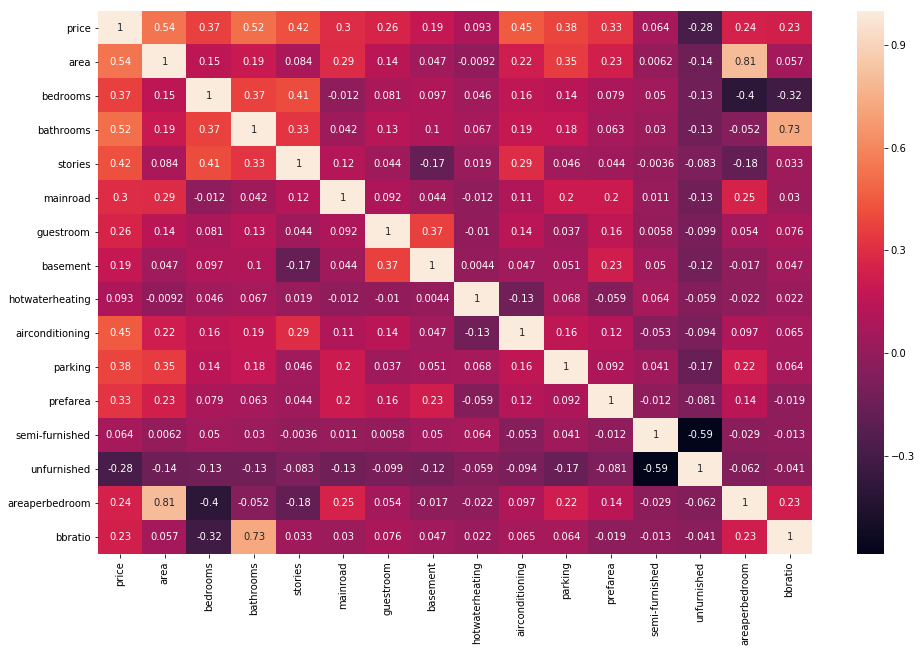

In [215]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(housing.corr(),annot = True)

In [216]:
# Adding  constant variable to test dataframe
X_test_m6 = sm.add_constant(X_test)

In [217]:
# Making predictions
y_pred_m1 = lm_1.predict(X_test_m6)

In [206]:
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_m1)))

RMSE : 1100958.2668758854


### Dropping the Variable and Updating the Model

In [135]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('bbratio', 1)

In [136]:
# Create a second fitted model
lm_2 = sm.OLS(y_train,X_train).fit()

In [137]:
#Let's see the summary of our second linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     57.90
Date:                Thu, 09 Aug 2018   Prob (F-statistic):           9.83e-84
Time:                        17:52:33   Log-Likelihood:                 375.90
No. Observations:                 381   AIC:                            -721.8
Df Residuals:                     366   BIC:                            -662.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0016      0.005     

### Dropping the Variable and Updating the Model

In [138]:
# Calculating Vif value
vif_cal(input_data=housing.drop(["bbratio"], axis=1), dependent_col="price")

,Var,Vif
13,areaperbedroom,14.14
0,area,12.84
1,bedrooms,4.99
12,unfurnished,1.68
11,semi-furnished,1.59
3,stories,1.50
6,basement,1.32
2,bathrooms,1.29
5,guestroom,1.22
9,parking,1.22


In [139]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('bedrooms', 1)

In [140]:
# Create a third fitted model
lm_3 = sm.OLS(y_train,X_train).fit()

In [141]:
#Let's see the summary of our third linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     62.36
Date:                Thu, 09 Aug 2018   Prob (F-statistic):           1.71e-84
Time:                        17:52:38   Log-Likelihood:                 375.54
No. Observations:                 381   AIC:                            -723.1
Df Residuals:                     367   BIC:                            -667.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0016      0.005     

In [142]:
# Calculating Vif value
vif_cal(input_data=housing.drop(["bedrooms","bbratio"], axis=1), dependent_col="price")

,Var,Vif
0,area,4.21
12,areaperbedroom,3.88
11,unfurnished,1.67
10,semi-furnished,1.58
2,stories,1.49
5,basement,1.32
1,bathrooms,1.29
8,parking,1.22
4,guestroom,1.21
7,airconditioning,1.21


### Dropping the Variable and Updating the Model

In [143]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('areaperbedroom', 1)

In [144]:
# Create a fourth fitted model
lm_4 = sm.OLS(y_train,X_train).fit()

In [145]:
#Let's see the summary of our fourth linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     67.18
Date:                Thu, 09 Aug 2018   Prob (F-statistic):           5.74e-85
Time:                        17:52:45   Log-Likelihood:                 374.46
No. Observations:                 381   AIC:                            -722.9
Df Residuals:                     368   BIC:                            -671.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0014      0.005     

In [146]:
# Calculating Vif value
vif_cal(input_data=housing.drop(["bedrooms","bbratio","areaperbedroom"], axis=1), dependent_col="price")

,Var,Vif
11,unfurnished,1.67
10,semi-furnished,1.58
0,area,1.32
2,stories,1.30
5,basement,1.30
1,bathrooms,1.22
4,guestroom,1.21
7,airconditioning,1.21
8,parking,1.21
3,mainroad,1.16


### Dropping the Variable and Updating the Model

In [147]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('guestroom', 1)

In [148]:
# Create a fifth fitted model
lm_5 = sm.OLS(y_train,X_train).fit()

In [149]:
#Let's see the summary of our fifth linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     72.99
Date:                Thu, 09 Aug 2018   Prob (F-statistic):           1.51e-85
Time:                        17:52:49   Log-Likelihood:                 373.58
No. Observations:                 381   AIC:                            -723.2
Df Residuals:                     369   BIC:                            -675.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0016      0.005     

In [150]:
# Calculating Vif value
vif_cal(input_data=housing.drop(["bedrooms","bbratio","areaperbedroom","guestroom"], axis=1), dependent_col="price")

,Var,Vif
10,unfurnished,1.67
9,semi-furnished,1.58
0,area,1.31
2,stories,1.29
1,bathrooms,1.22
6,airconditioning,1.21
7,parking,1.20
3,mainroad,1.15
8,prefarea,1.15
4,basement,1.14


### Dropping the Variable and Updating the Model

In [151]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('mainroad', 1)

In [152]:
# Create a sixth fitted model
lm_6 = sm.OLS(y_train,X_train).fit()

In [153]:
#Let's see the summary of our sixth linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     79.72
Date:                Thu, 09 Aug 2018   Prob (F-statistic):           5.66e-86
Time:                        17:52:56   Log-Likelihood:                 372.29
No. Observations:                 381   AIC:                            -722.6
Df Residuals:                     370   BIC:                            -679.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0019      0.005     

In [154]:
# Calculating Vif value
vif_cal(input_data=housing.drop(["bedrooms","bbratio","areaperbedroom","semi-furnished","mainroad"], axis=1), dependent_col="price")

,Var,Vif
4,basement,1.30
2,stories,1.28
0,area,1.27
1,bathrooms,1.22
3,guestroom,1.21
6,airconditioning,1.20
7,parking,1.19
8,prefarea,1.13
9,unfurnished,1.07
5,hotwaterheating,1.04


#### Assessment  question
#### Design four models by dropping all the variables one by one with high vif (>5). Then, compare the results.

## Making Predictions Using the Final Model

### Prediction with Model 6

In [155]:
# Adding  constant variable to test dataframe
#X_test_m6 = sm.add_constant(X_test)


In [156]:
# Creating X_test_m6 dataframe by dropping variables from X_test_m6
X_test_m6 = X_test_m6.drop(["bedrooms","bbratio","areaperbedroom","semi-furnished","basement"], axis=1)
X_test_m6

,const,area,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea,unfurnished
265,1.0,0.058382,0.237920,0.731498,0.141284,-0.177982,-0.045872,0.684404,-0.231193,-0.234862,0.673394
54,1.0,-0.070140,0.237920,0.064832,0.141284,-0.177982,-0.045872,-0.315596,0.435474,-0.234862,-0.326606
171,1.0,0.058382,0.237920,0.731498,0.141284,0.822018,-0.045872,0.684404,0.102141,-0.234862,-0.326606
244,1.0,-0.079075,0.237920,0.064832,0.141284,-0.177982,-0.045872,0.684404,0.102141,-0.234862,-0.326606
268,1.0,-0.141618,-0.095413,-0.268502,0.141284,0.822018,-0.045872,-0.315596,-0.231193,-0.234862,0.673394
231,1.0,-0.091721,-0.095413,-0.268502,0.141284,-0.177982,-0.045872,0.684404,0.435474,-0.234862,-0.326606
25,1.0,0.092746,0.237920,0.398165,0.141284,-0.177982,-0.045872,0.684404,-0.231193,-0.234862,0.673394
169,1.0,-0.165192,0.237920,0.064832,-0.858716,-0.177982,-0.045872,-0.315596,-0.231193,-0.234862,-0.326606
494,1.0,-0.096257,-0.095413,-0.268502,0.141284,0.822018,-0.045872,-0.315596,-0.231193,-0.234862,-0.326606
120,1.0,0.010272,-0.095413,-0.268502,-0.858716,-0.177982,-0.045872,0.684404,-0.231193,0.765138,0.673394


In [157]:
# Making predictions
y_pred_m7 = lm_6.predict(X_test_m6)

## Model Evaluation

Text(0,0.5,'Housing Price')

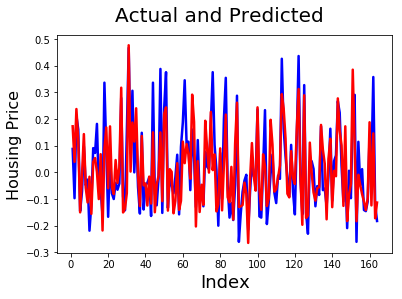

In [158]:
# Actual vs Predicted
c = [i for i in range(1,165,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred_m6, color="red",  linewidth=2.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Housing Price', fontsize=16)                       # Y-label

Text(0,0.5,'y_pred')

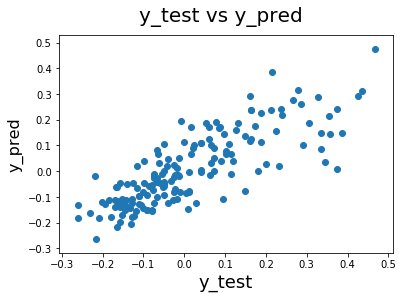

In [159]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_m6)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0,0.5,'ytest-ypred')

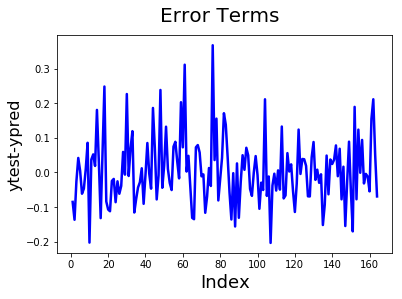

In [160]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,165,1)]
plt.plot(c,y_test-y_pred_m6, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

Text(0,0.5,'Index')

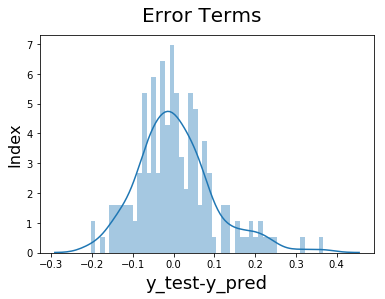

In [161]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred_m6),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

In [163]:
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_m6)))

RMSE : 0.09532106206717539
